#### A Spam Classifier 
The dataset has ham == good and spam == bad

In [16]:
import pandas as pd
df = pd.read_csv(r'spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.head()

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# counting the number of good and bad mails
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [19]:
#df_spam = df[df.class_label=='spam']

In [20]:
#plotting the counts
import matplotlib.pyplot as plt
import numpy as np 
labels = ['ham', 'spam']
counts = [4825, 747]

In [21]:
#converting labels into binary
y = np.arange(len(labels))
y

array([0, 1])

([<matplotlib.axis.XTick at 0x1fd70475f10>,
 [Text(0, 0, 'ham'), Text(1, 0, 'spam')])

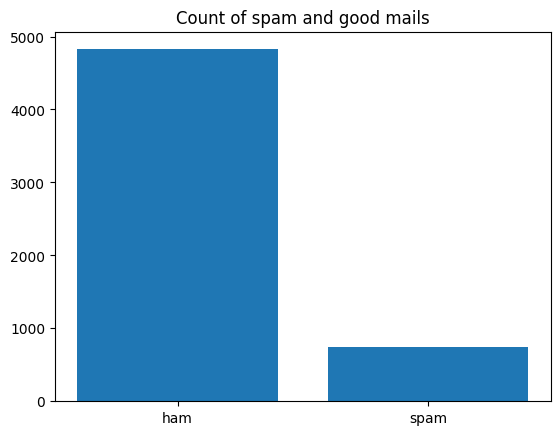

In [22]:
plt.bar(y, counts)
plt.title("Count of spam and good mails")
plt.xticks(y, labels)

In [23]:
#towards creating the data for model to be trained on
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 42)

In [25]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


### Using count vectorizer method

In [26]:
list = x_train.tolist()
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
#initialize countVectorizer
cv = CountVectorizer(strip_accents = ascii)

In [28]:
#get the document-term matrix
word_count_vector=cv.fit_transform(list)

In [29]:
cv.vocabulary_

{'to': 6382,
 'review': 5311,
 'and': 872,
 'keep': 3619,
 'the': 6269,
 'fantastic': 2584,
 'nokia': 4429,
 'gage': 2852,
 'game': 2859,
 'deck': 2045,
 'with': 7013,
 'club': 1717,
 'go': 2942,
 'www': 7102,
 'cnupdates': 1731,
 'com': 1761,
 'newsletter': 4394,
 'unsubscribe': 6665,
 'from': 2816,
 'alerts': 823,
 'reply': 5259,
 'word': 7050,
 'out': 4620,
 'just': 3589,
 'got': 2981,
 'outta': 4631,
 'class': 1691,
 'gonna': 2962,
 'gym': 3055,
 'is': 3470,
 'there': 6286,
 'coming': 1773,
 'friday': 2798,
 'leave': 3743,
 'for': 2739,
 'pongal': 4888,
 'do': 2196,
 'you': 7169,
 'get': 2904,
 'any': 902,
 'news': 4393,
 'your': 7175,
 'work': 7052,
 'place': 4818,
 'hi': 3177,
 'dear': 2030,
 'call': 1480,
 'me': 4064,
 'its': 3487,
 'urgnt': 6694,
 'don': 2228,
 'know': 3661,
 'whats': 6953,
 'problem': 5001,
 'want': 6857,
 'or': 4589,
 'if': 3342,
 'have': 3115,
 'other': 4610,
 'at': 1017,
 'least': 3741,
 'tell': 6213,
 'wating': 6882,
 'my': 4306,
 'friend': 2802,
 'here': 

In [32]:
x_test_vector = cv.transform(x_test)
#x_test_vector

In [34]:
from sklearn.naive_bayes import MultinomialNB
# train a classifier
classifier = MultinomialNB()
classifier.fit(word_count_vector, y_train)

MultinomialNB()

In [35]:
# check the accuracy of the classifier
print("classifier accuracy {:.2f}%".format(classifier.score(x_test_vector, y_test) * 100))

classifier accuracy 98.27%


In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [36]:
#assign the predicted labels to a variable
labels = classifier.predict(x_test_vector)

In [39]:
#now creating a confucion matrix
actual = y_test
predicted = labels 
results = confusion_matrix(actual, predicted) 

In [41]:
#print the confusion matrix
print('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[1448    5]
 [  24  195]]


In [46]:
#print the classification report
print ('                              Report\n')
print (classification_report(actual, predicted) )

                              Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.97      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [48]:
#calculate the f1 score of the classifier
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

F-Measure: 0.931


<AxesSubplot: >

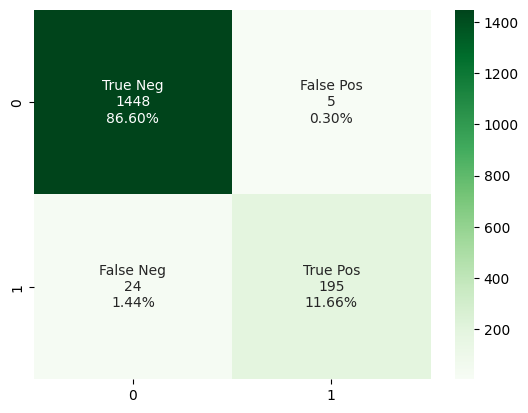

In [50]:
#heatmap for confusion matrix
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Greens')